In [76]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble  import  GradientBoostingRegressor, AdaBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [77]:
df_train = pd.read_csv('train.csv')

In [78]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [82]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [83]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [84]:
df_train.groupby('Item_Weight')['Item_Identifier'].count()

,Item_Identifier
Item_Weight,
4.555,4
4.590,5
4.610,7
4.615,4
4.635,5
...,...
21.000,6
21.100,17
21.200,5


In [85]:
df_train[df_train['Item_Identifier']=='FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [86]:
df_train['Item_Weight']  = df_train.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(method='ffill').fillna(method='bfill'))

In [87]:
df_train[df_train['Item_Identifier']=='FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,9.3,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [88]:
df_train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [89]:
df_train.drop('Outlet_Size',axis=1,inplace=True)
df_train.dropna(inplace=True)

In [90]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Location_Type,0
Outlet_Type,0


In [91]:
# creating categorical & numerical features from the table
cat_cols = []
num_cols = []
for i in df_train.columns:
    if df_train[i].dtype == 'O':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [92]:
print(cat_cols)
print(num_cols)


['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [93]:
cat_cols2 = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']

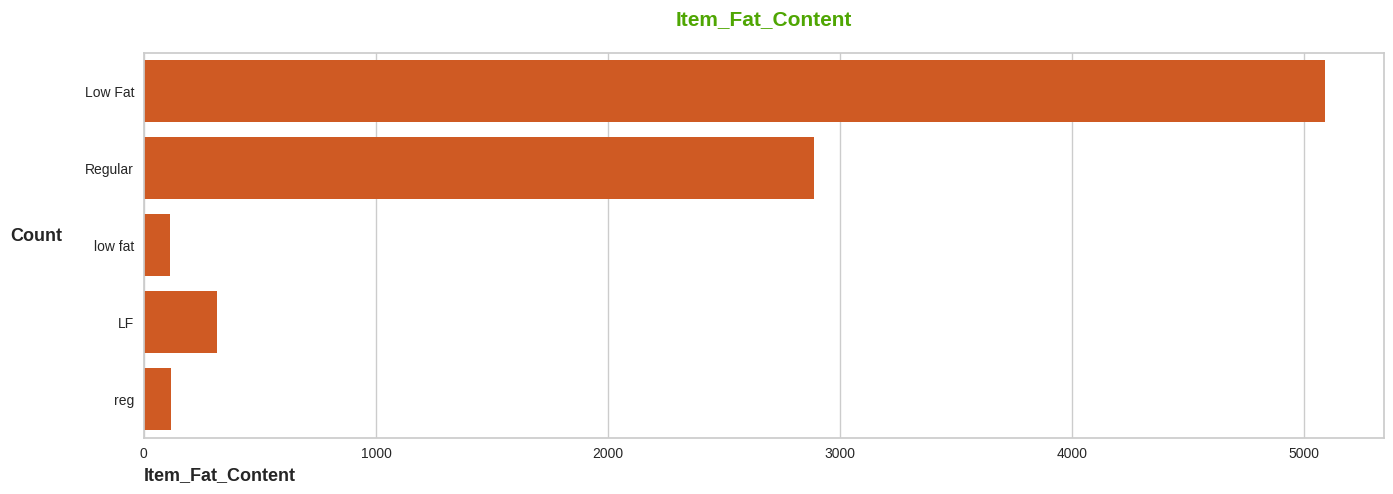

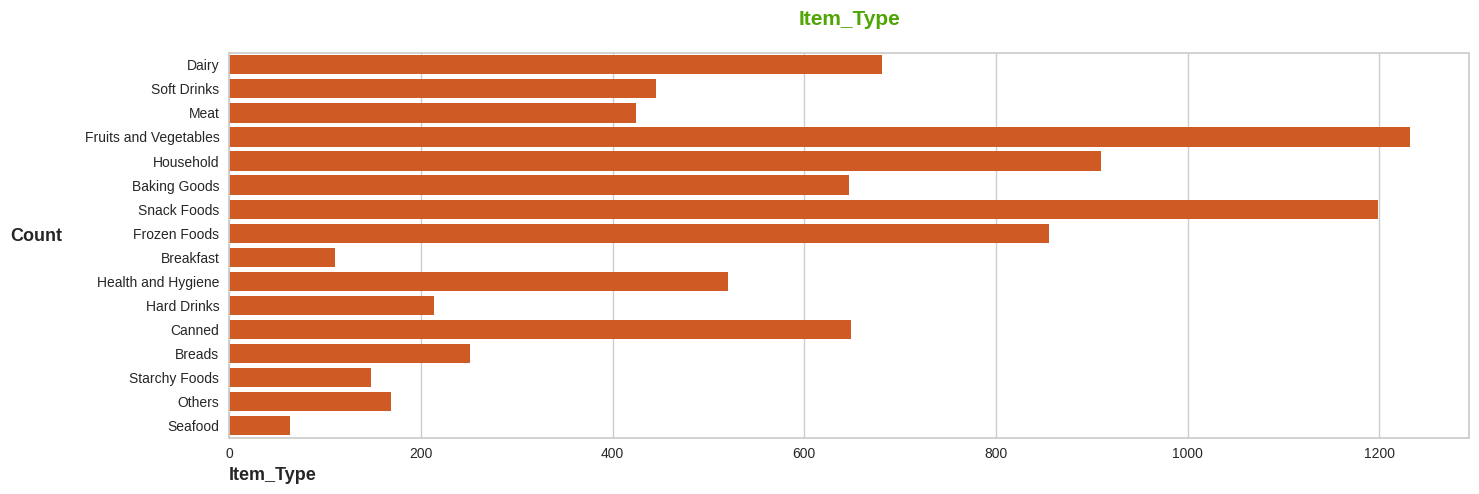

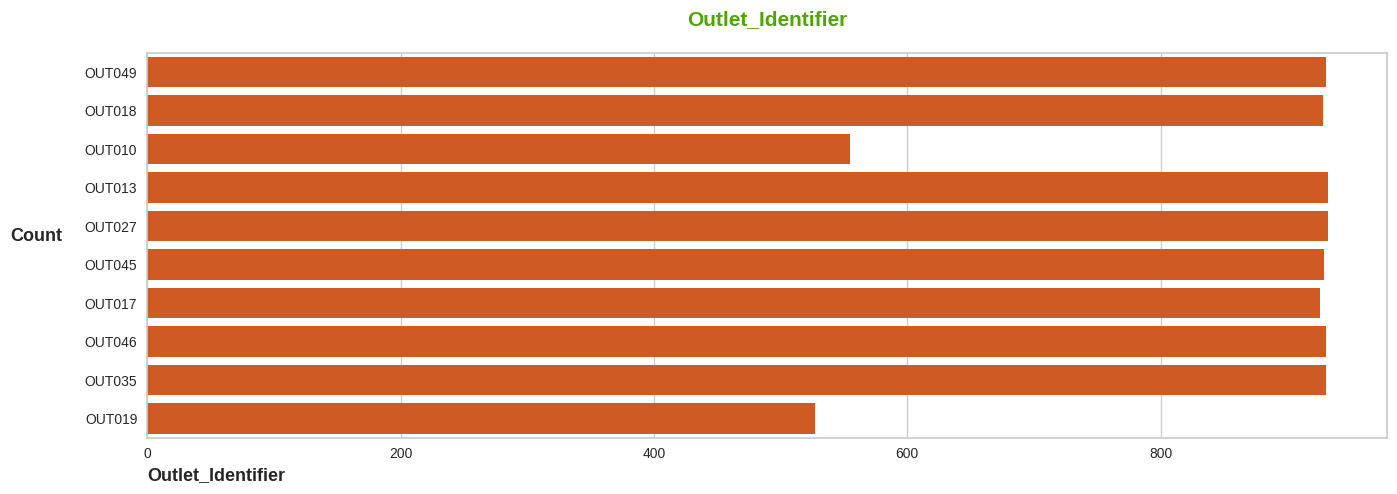

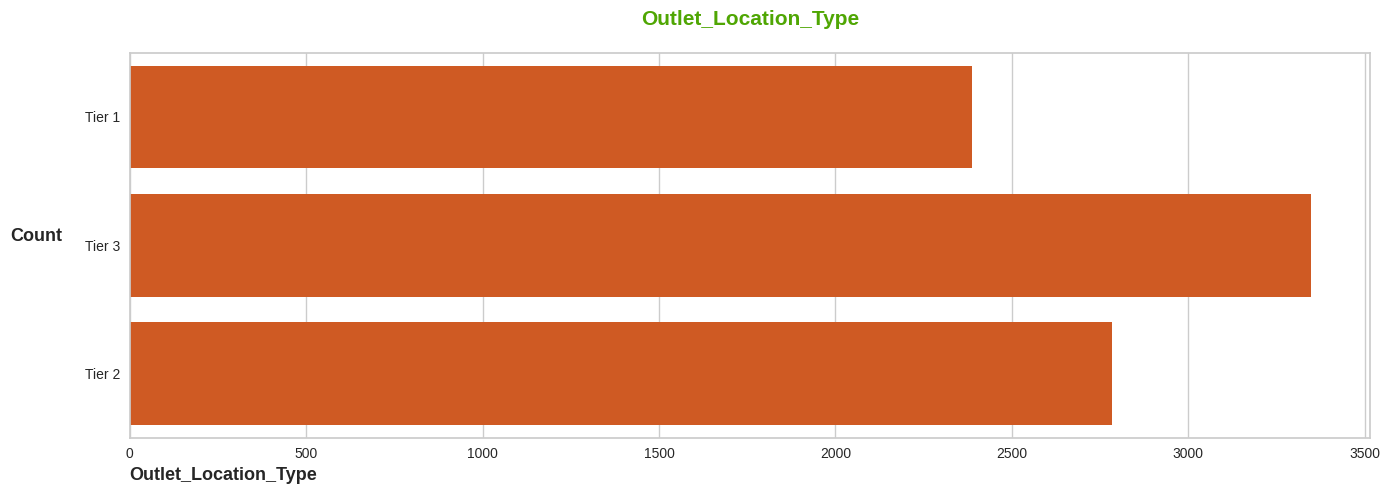

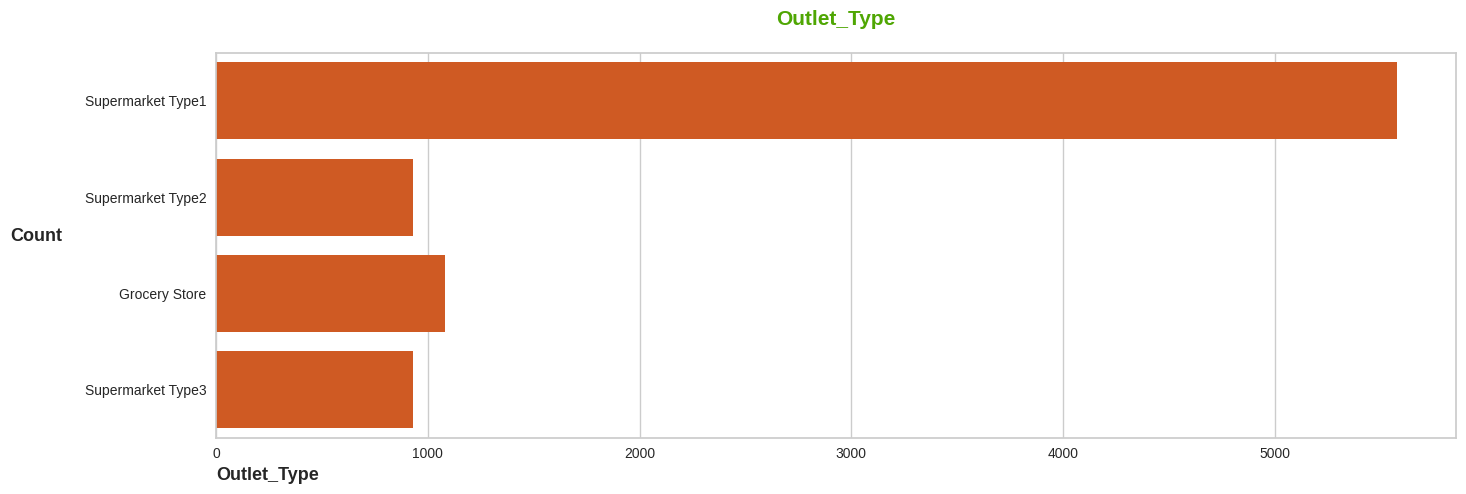

In [94]:
for i in cat_cols2:
    fig,ax= plt.subplots(figsize=(16,5))
    plt.subplots_adjust(wspace=0.8,hspace=0.8)
    sns.countplot(df_train[i],color='#eb4f07')
    plt.title(i,color='#4fa603',fontsize=15,fontweight='bold',pad=20)
    plt.xlabel(i,fontsize=13,fontweight='bold',rotation=0,loc='left')
    plt.ylabel('Count',fontsize=13,fontweight='bold',rotation=0,labelpad=35)
    plt.show()


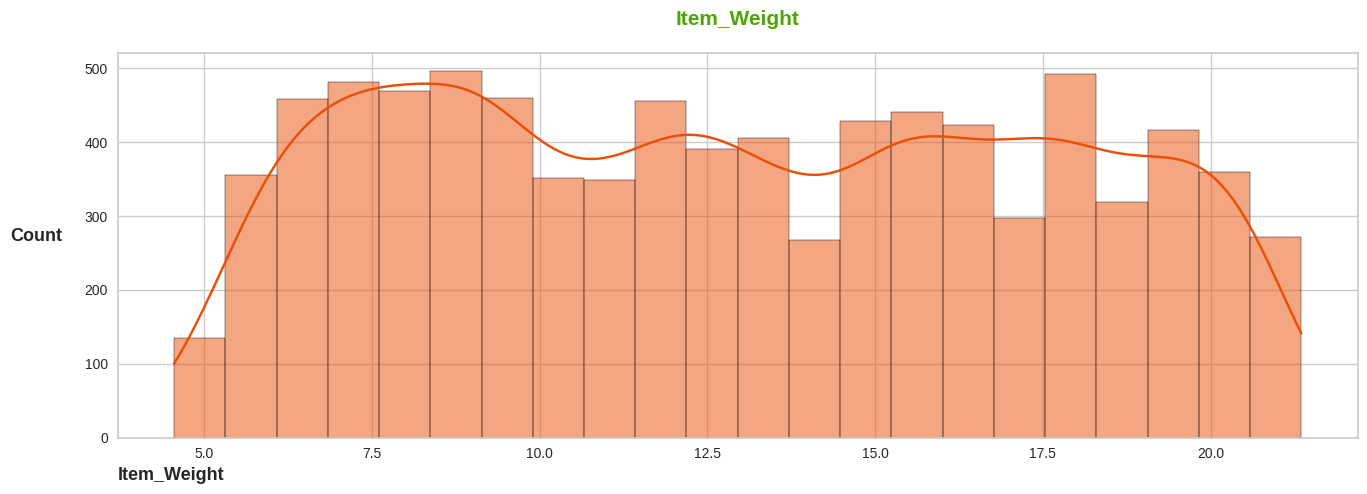

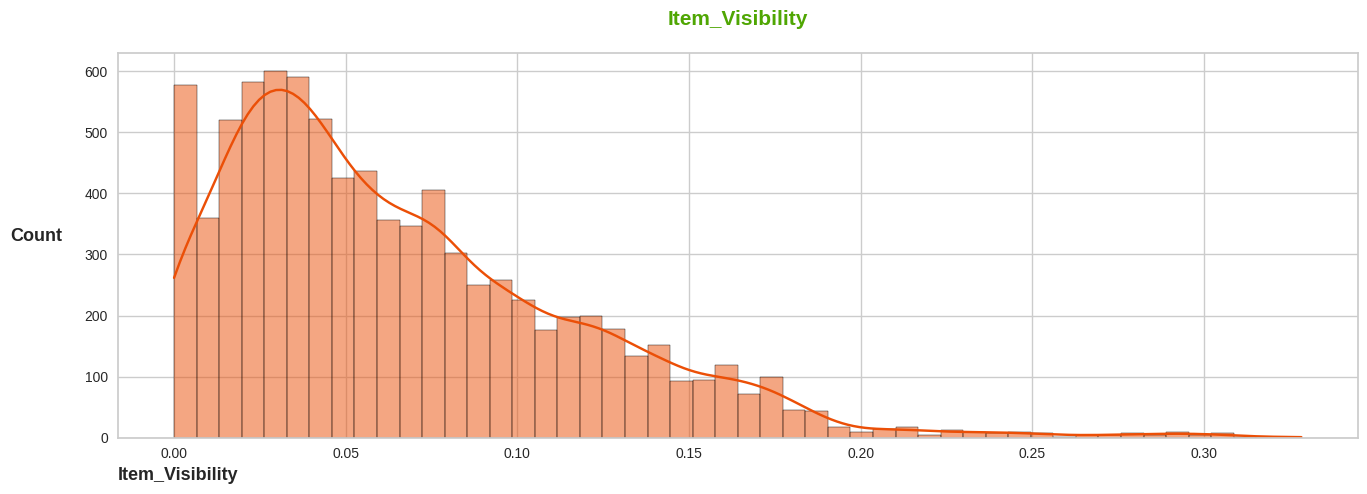

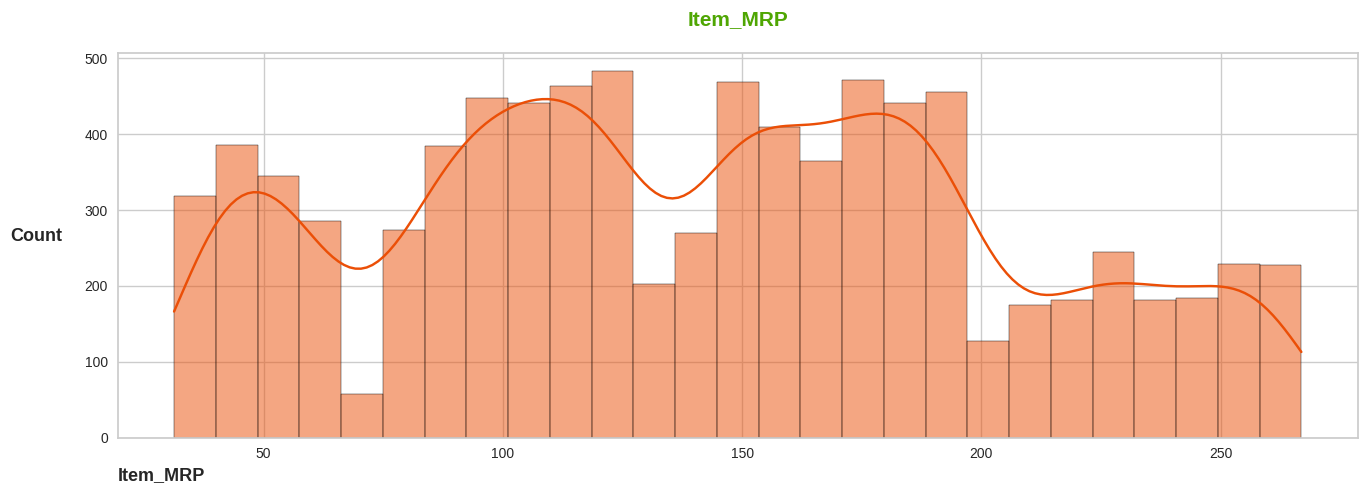

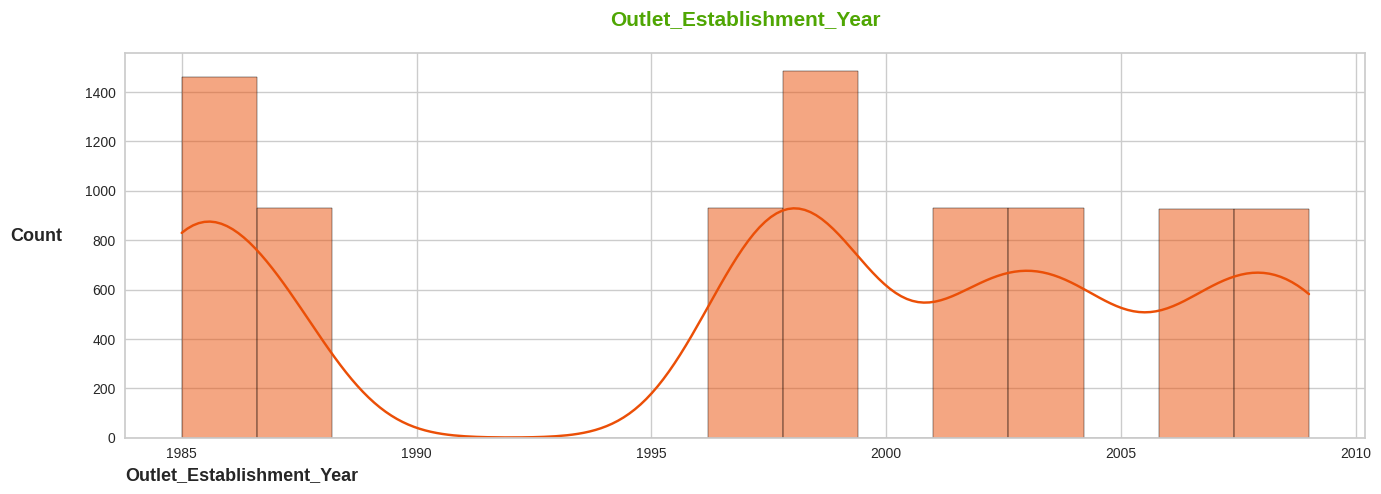

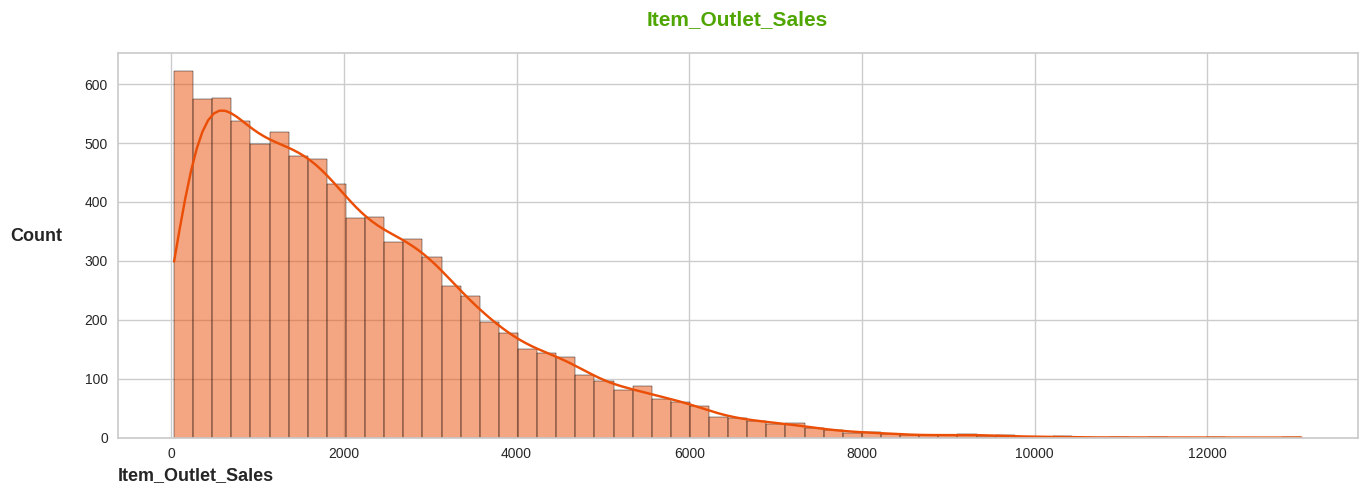

In [95]:
for i in num_cols:
    fig,ax= plt.subplots(figsize=(16,5))
    plt.subplots_adjust(wspace=0.8,hspace=0.8)
    sns.histplot(df_train[i],color='#eb4f07',kde=True)
    plt.title(i,color='#4fa603',fontsize=15,fontweight='bold',pad=20)
    plt.xlabel(i,fontsize=13,fontweight='bold',rotation=0,loc='left')
    plt.ylabel('Count',fontsize=13,fontweight='bold',rotation=0,labelpad=35)
    plt.show()

In [96]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [97]:
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5088
Regular,2886
LF,316
reg,117
low fat,112


In [98]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [99]:
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5516
Regular,3003


In [100]:
fat_content_sales = df_train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().reset_index()
fat_content_sales

,Item_Fat_Content,Item_Outlet_Sales
0,Low Fat,1.189966e+07
1,Regular,6.681887e+06


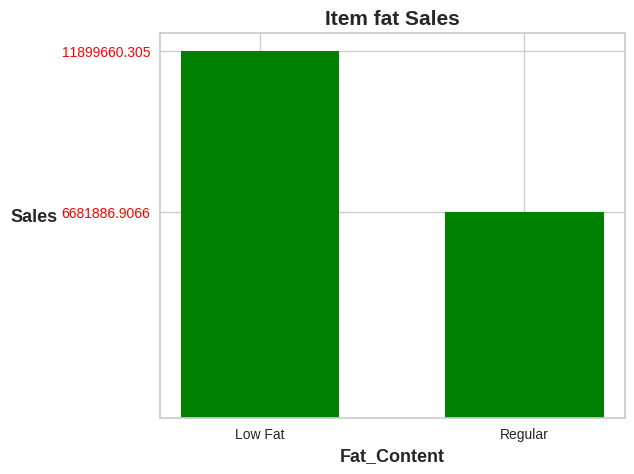

In [101]:
plt.figure(figsize=(6,5))
plt.bar(x='Item_Fat_Content',height='Item_Outlet_Sales',data=fat_content_sales,width=0.6,color='green')
plt.title('Item fat Sales',fontsize=15,fontweight='bold')
plt.xlabel('Fat_Content',fontsize=13,fontweight='bold')
plt.ylabel('Sales',fontsize=13,fontweight='bold',rotation=0,labelpad=20)
plt.yticks(ticks=fat_content_sales['Item_Outlet_Sales'], labels=fat_content_sales['Item_Outlet_Sales'],color='red')
plt.show()

In [102]:
Item_Type_sales = df_train.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index()
Item_Type_sales

,Item_Type,Item_Outlet_Sales
0,Baking Goods,1.265405e+06
1,Breads,5.532372e+05
2,Breakfast,2.322990e+05
3,Canned,1.444151e+06
4,Dairy,1.519141e+06
5,Frozen Foods,1.824165e+06
6,Fruits and Vegetables,2.820060e+06
7,Hard Drinks,4.577934e+05
8,Health and Hygiene,1.045200e+06
9,Household,2.055494e+06


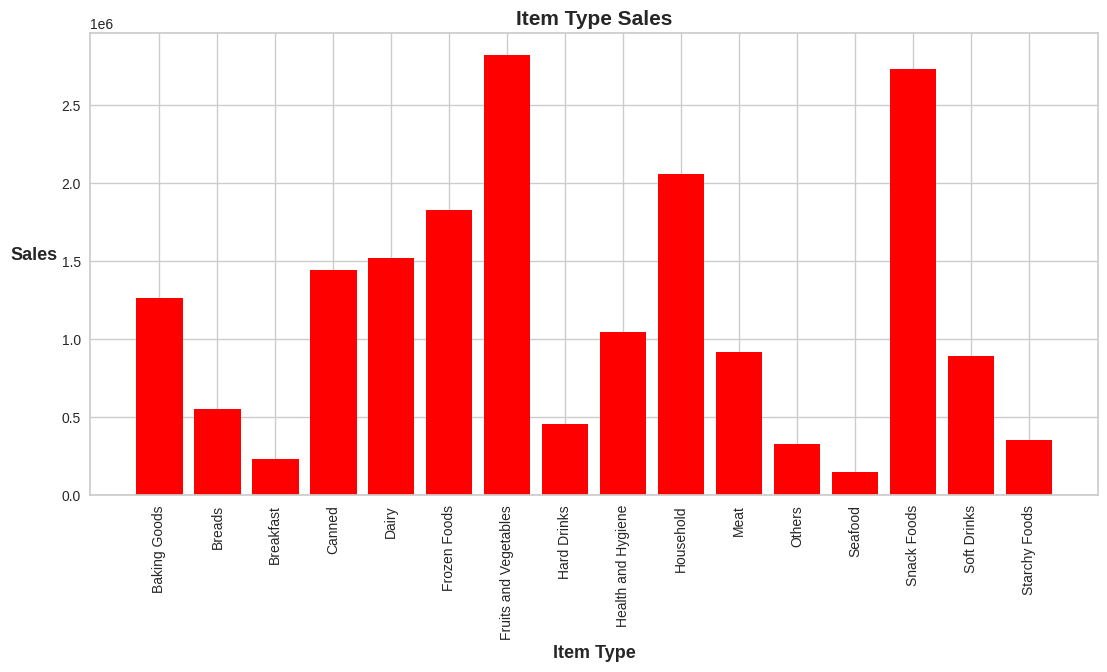

In [103]:
plt.figure(figsize=(13,6))
plt.bar(x='Item_Type',height='Item_Outlet_Sales',data=Item_Type_sales,width=0.8,color='red')
plt.title('Item Type Sales',fontsize=15,fontweight='bold')
plt.xlabel('Item Type',fontsize=13,fontweight='bold')
plt.ylabel('Sales',fontsize=13,fontweight='bold',rotation=0,labelpad=20)
#plt.yticks(ticks=Item_Type_sales['Item_Outlet_Sales'], labels=Item_Type_sales['Item_Outlet_Sales'],color='red')
plt.xticks(ticks=Item_Type_sales['Item_Type'],labels=Item_Type_sales['Item_Type'],rotation=90)
plt.show()

In [104]:
fat_content_sales = df_train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().reset_index()
fat_content_sales

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4.481939e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.627295e+06


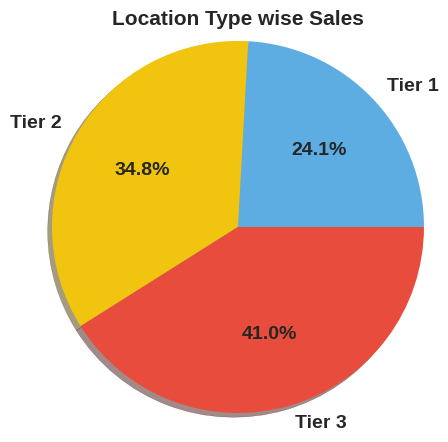

In [105]:
plt.figure(figsize=(5,6))
plt.pie(x='Item_Outlet_Sales',labels='Outlet_Location_Type',data=fat_content_sales,autopct='%1.1f%%',radius=1.2,shadow=True,colors=['#5dade2','#f1c40f','#e74c3c' ],textprops={'fontsize':14,'fontweight':'bold'})
plt.title('Location Type wise Sales',fontsize=15,fontweight='bold')
plt.show()

In [106]:
lab_end = LabelEncoder()
for i in cat_cols:
  df_train[i] = lab_end.fit_transform(df_train[i])

In [107]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,2,2,443.4228
2,660,17.50,0,0.016760,10,141.6180,9,1999,0,1,2097.2700
3,1117,19.20,1,0.000000,6,182.0950,0,1998,2,0,732.3800
4,1293,8.93,0,0.000000,9,53.8614,1,1987,2,1,994.7052


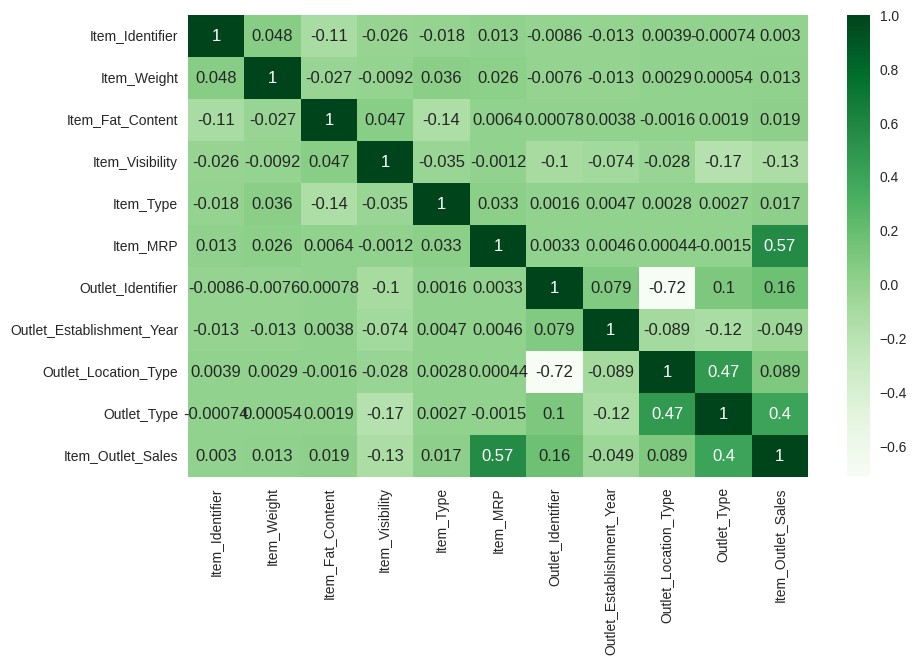

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens')
plt.show()

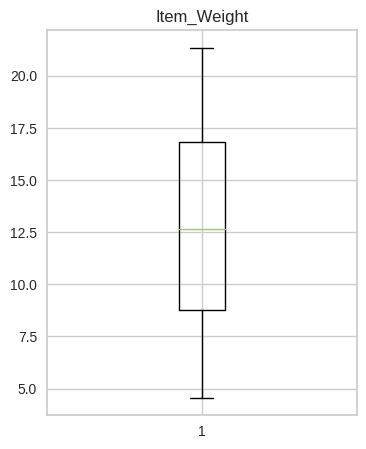

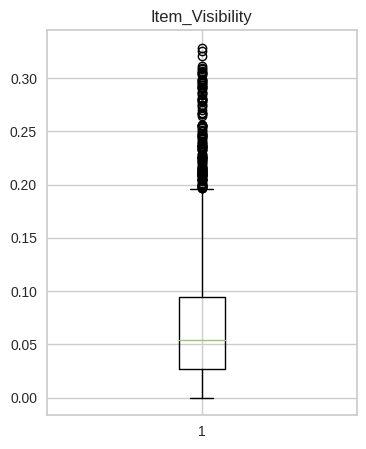

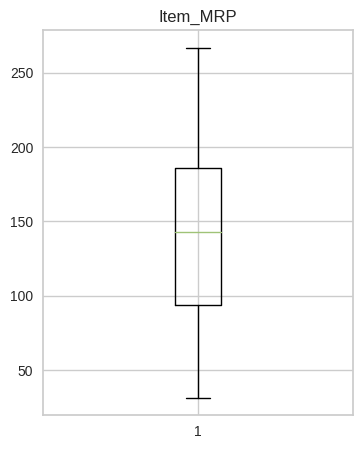

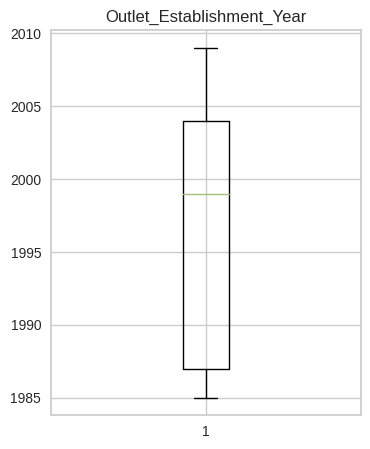

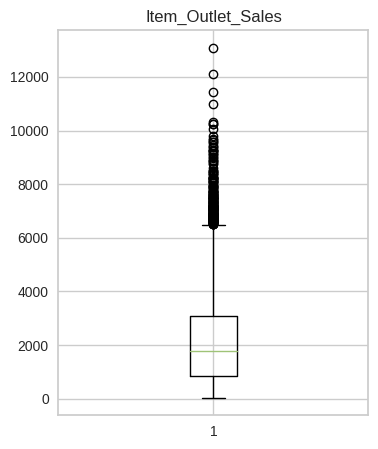

In [109]:
for i in num_cols:
  plt.figure(figsize=(4,5))
  plt.boxplot(df_train[i])
  plt.title(i)
  plt.show()


In [110]:
q3,q1=np.percentile(df_train["Item_Visibility"],[75,25])
iqr=q3-q1

In [111]:
df_train["Item_Visibility"].describe()

,Item_Visibility
count,8519.000000
mean,0.066112
std,0.051586
min,0.000000
25%,0.026983
50%,0.053925
75%,0.094558
max,0.328391


{'whiskers': [<matplotlib.lines.Line2D at 0x7e9109e06d40>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9109e071f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9109e05840>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9109e04610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9109e07af0>],
 'means': []}

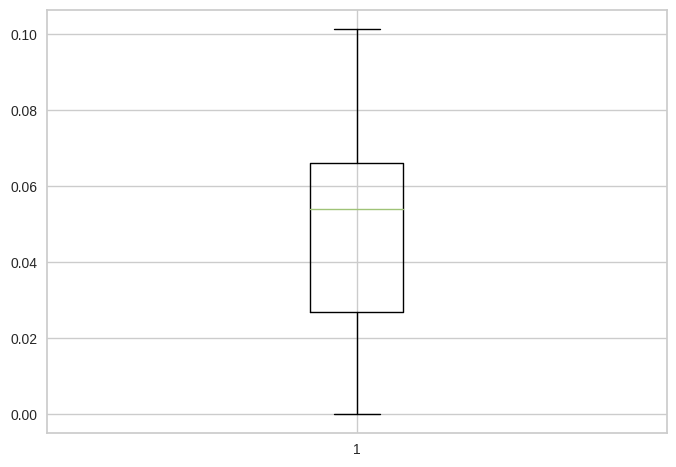

In [112]:
for i in df_train.index: # Iterate over the actual index of the DataFrame
    if df_train.loc[i,"Item_Visibility"]>1.5*iqr:
        df_train.loc[i,"Item_Visibility"]=0.066132

plt.boxplot(df_train['Item_Visibility'])


In [113]:
# dropping
df_train = df_train.drop('Outlet_Establishment_Year',axis=1)

In [114]:
X = df_train.drop('Item_Outlet_Sales',axis=1)
y = df_train['Item_Outlet_Sales']

In [115]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_scaled = sd.fit_transform(X)
y_scaled = sd.fit_transform(y.values.reshape(-1,1))

In [116]:
pip install pycaret

In [117]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [118]:
from pycaret.regression import *
reg_setup= setup(data=df_train,target='Item_Outlet_Sales')


,Description,Value
0,Session id,8235
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8519, 10)"
4,Transformed data shape,"(8519, 10)"
5,Transformed train set shape,"(5963, 10)"
6,Transformed test set shape,"(2556, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [119]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,753.4752,1148389.0882,1070.5087,0.5968,0.5580,0.5639,1.1720
lightgbm,Light Gradient Boosting Machine,773.0816,1228774.6089,1107.1143,0.5688,0.5568,0.5696,0.3220
rf,Random Forest Regressor,792.3810,1286003.7005,1132.7467,0.5486,0.5536,0.5687,4.2760
et,Extra Trees Regressor,807.0783,1327962.5495,1151.3499,0.5337,0.5624,0.5773,1.8880
ada,AdaBoost Regressor,888.4390,1361299.1637,1165.6504,0.5210,0.7898,1.1592,0.1690
xgboost,Extreme Gradient Boosting,835.8054,1411005.1750,1186.6684,0.5048,0.6448,0.6487,0.2260
ridge,Ridge Regression,902.3841,1427261.3228,1193.9486,0.4983,0.7649,1.0022,0.0280
lar,Least Angle Regression,902.3297,1427299.3906,1193.9714,0.4983,0.7634,1.0022,0.0510
lr,Linear Regression,902.3297,1427299.3906,1193.9714,0.4983,0.7634,1.0022,1.3630
br,Bayesian Ridge,902.7014,1427791.4216,1194.1523,0.4982,0.7633,1.0023,0.1330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [120]:
gbr = GradientBoostingRegressor()

In [121]:
param_grid = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate':[0.1,0.01,0.2,0.3,0.05,],
               'n_estimators':[100,200,300,50],
              'min_samples_split': [2,5,10,15],
              'max_depth' : [3,4,5,6,7],
              'max_features':['sqrt', 'log2']
              }
from sklearn.model_selection import RandomizedSearchCV
rmd = RandomizedSearchCV(gbr, param_grid)
rmd.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.2, 0.3,
                                                          0.05],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 50]})

In [122]:
# Print the optimal values for the hyperparameters
print(rmd.best_params_)

{'n_estimators': 50, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 5, 'loss': 'squared_error', 'learning_rate': 0.1}


In [136]:
gbr = GradientBoostingRegressor(n_estimators=50, min_samples_split= 10, max_features= 'log2', max_depth= 5, loss= 'squared_error', learning_rate= 0.1)
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.4481812301817315
0.4136579220054793
0.5947249783484163


In [137]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(gbr, file)

In [138]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [139]:
model

GradientBoostingRegressor(max_depth=5, max_features='log2',
                          min_samples_split=10, n_estimators=50)